## Parse Data

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def bars(df, **kwargs):
    ax = sns.barplot(data=df,alpha=0.8, **kwargs)
    ax = sns.stripplot(data=df, ax=ax, size=6, dodge=True, legend=False,  edgecolor='black', linewidth=1, **kwargs)
    if 'hue' in kwargs.keys():
      plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    return ax

In [5]:
import pandas as pd
from pathlib import Path

d = pd.read_excel('240814_qPCR_processed.xlsx')[['Well', 'Cp', 'Strain', 'Phage']]
d['L1'] = d.Strain.map(lambda x: x.split('/')[-1].strip() if '/' in x else pd.NA)
d['L2'] = d.Strain.map(lambda x: x.split('/')[0].split(' - ')[-1] if '/' in x else pd.NA)
d['Phage'] = d.Phage.str.strip()
d['Strain'] = d.Strain.str.strip()
d = d[d.Phage != '-']
l1_degron = {'1102': 'FIADWEP', '1076': 'EGLN3-WT', '1098': 'FIQDVEP', '1099': 'MIQDVEP', '1033': 'EGLN3-WT', '1035': 'a-syn', '1081': 'a-syn', '1096': 'EGLN3-pep' }
l1_promoter = {l1: 'strong' if l1 in {'1031', '1033', '1035'} else 'weak' for l1 in l1_degron.keys()}
d['Substrate'] = d.L1.map(lambda x: l1_degron.get(x, pd.NA))
d['Promoter'] = d.L1.map(lambda x: l1_promoter.get(x, pd.NA))
d

,Well,Cp,Strain,Phage,L1,L2,Substrate,Promoter
0,A12,16.90,S2060 - 2009/1033,SIAH1,1033,2009,EGLN3-WT,strong
1,B12,17.55,S2060 - 2009/1033,SIAH1,1033,2009,EGLN3-WT,strong
2,C12,19.48,S2060 - 2009/1033,SIAH2,1033,2009,EGLN3-WT,strong
3,D12,19.52,S2060 - 2009/1033,SIAH2,1033,2009,EGLN3-WT,strong
4,E12,16.57,S2060 - 2009/1033,TadA,1033,2009,EGLN3-WT,strong
...,...,...,...,...,...,...,...,...
157,C23,17.50,S2060 - 2008/1096,TadA,1096,2008,EGLN3-pep,weak
158,E23,17.15,S2060 - 2008/1098,TadA,1098,2008,FIQDVEP,weak
159,G23,16.11,S2060 - 2008/1099,TadA,1099,2008,MIQDVEP,weak
160,M23,17.10,LB,TadA,<NA>,<NA>,<NA>,<NA>


In [6]:
d.to_excel('240814_qPCR_processed.xlsx', index=False)

## Compute Propagation

In [7]:
d[(d.Strain == 'LB') & (d.Cp < 20)]

,Well,Cp,Strain,Phage,L1,L2,Substrate,Promoter
154,M22,17.14,LB,TadA,<NA>,<NA>,<NA>,<NA>
160,M23,17.10,LB,TadA,<NA>,<NA>,<NA>,<NA>


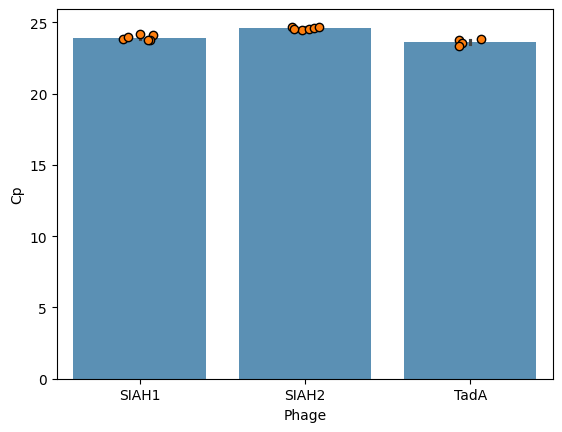

In [8]:
import seaborn as sns

_ = bars(d[(d.Strain == 'LB') & (d.Cp > 20)], x='Phage', y='Cp')

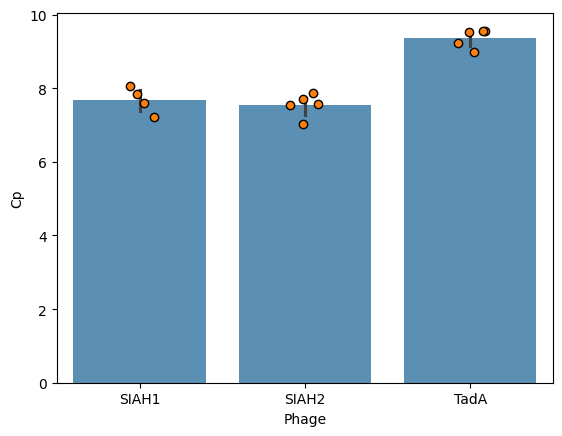

In [9]:
_ = bars(d[d.Strain == 'S2208'], x='Phage', y='Cp')

In [10]:
d['cp_init'] = pd.NA
for phage in ['SIAH1', 'SIAH2', 'TadA']:
    d.loc[d.Phage == phage, 'cp_init'] = d[(d.Phage == phage) & (d.Strain == 'LB')].Cp.mean() # & (d.Cp > 20)].Cp.mean()
d['log2(Fold Change)'] = d.cp_init - d.Cp

In [11]:
d.loc[d.Strain == 'S2208', 'Substrate'] = 'PC'
d.Phage = d.Phage.map({'SIAH1': 'SIAH1-SP', 'SIAH2': 'SIAH2-SP', 'TadA': 'UN-SP'})
d.Substrate = d.Substrate.map(lambda x: {'EGLN3-WT': 'EGLN3', 'a-syn': 'SNCA'}.get(x, x))

In [12]:
d

,Well,Cp,Strain,Phage,L1,L2,Substrate,Promoter,cp_init,log2(Fold Change)
0,A12,16.90,S2060 - 2009/1033,SIAH1-SP,1033,2009,EGLN3,strong,23.931667,7.031667
1,B12,17.55,S2060 - 2009/1033,SIAH1-SP,1033,2009,EGLN3,strong,23.931667,6.381667
2,C12,19.48,S2060 - 2009/1033,SIAH2-SP,1033,2009,EGLN3,strong,24.586667,5.106667
3,D12,19.52,S2060 - 2009/1033,SIAH2-SP,1033,2009,EGLN3,strong,24.586667,5.066667
4,E12,16.57,S2060 - 2009/1033,UN-SP,1033,2009,EGLN3,strong,21.445,4.875
...,...,...,...,...,...,...,...,...,...,...
157,C23,17.50,S2060 - 2008/1096,UN-SP,1096,2008,EGLN3-pep,weak,21.445,3.945
158,E23,17.15,S2060 - 2008/1098,UN-SP,1098,2008,FIQDVEP,weak,21.445,4.295
159,G23,16.11,S2060 - 2008/1099,UN-SP,1099,2008,MIQDVEP,weak,21.445,5.335
160,M23,17.10,LB,UN-SP,<NA>,<NA>,<NA>,<NA>,21.445,4.345


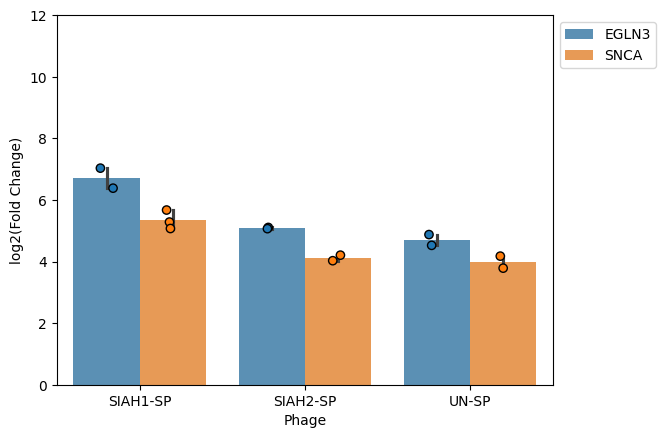

In [15]:
d_sub = d[((d.Substrate.isin({'EGLN3', 'SNCA'}) & (d.Promoter == 'strong')))]
ax = bars(d_sub, x='Phage', y='log2(Fold Change)', hue='Substrate')
ax.set_ylim(0, 12)
plt.savefig('../figs/20240813_fig1B.pdf', format='pdf')

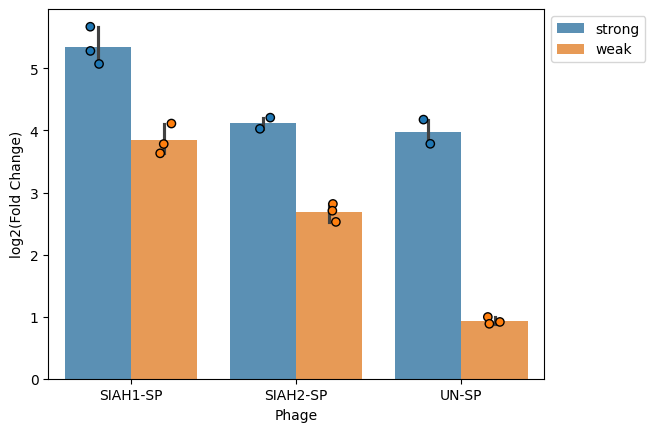

In [17]:
d_promoter = d[(d.Substrate.isin({'SNCA'}))]
_ = bars(d_promoter, x='Phage', y='log2(Fold Change)', hue='Promoter')

In [ ]:
d_degron = d[(d.Substrate.isin({'FIADWEP', 'EGLN3-WT', 'FIQDVEP', 'MIQDVEP', 'EGLN3-pep'})) & (d.Promoter == 'weak')]
_ = bars(d_degron, x='Phage', y='log2(Fold Change)', hue='Substrate')


/var/folders/5b/cl1vpvwx7z12hpb0ntpgryk40000gp/T/ipykernel_92291/914964815.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


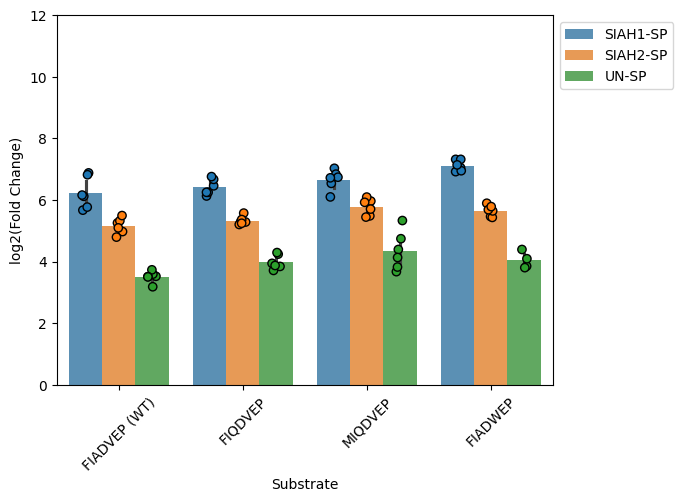

In [19]:
d_degron = d[(d.Substrate.isin({'EGLN3', 'FIADWEP', 'FIQDVEP', 'MIQDVEP'})) & (d.Promoter == 'weak')]
d_degron = d_degron.sort_values(by='Substrate', key=lambda x: pd.Categorical(x, categories=['EGLN3', 'FIQDVEP', 'MIQDVEP', 'FIADWEP'], ordered=True))
d_degron.Substrate = d_degron.Substrate.map(lambda x: {'EGLN3': 'FIADVEP (WT)'}.get(x, x))
ax = bars(d_degron, x='Substrate', y='log2(Fold Change)', hue='Phage')
ax.set_ylim(0, 12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.savefig('../figs/20240813_fig2.pdf', format='pdf')

In [ ]:
d.Substrate.unique()